In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh') 
import seaborn as sns 
%matplotlib inline

import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True)

In [87]:
#Read the input file
df = pd.read_csv("C:/Users/Arunima/OneDrive/Documents/GitHub/Fifa20/players_20.csv")

In [88]:
#Display the structure of the dataset
df.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,...,79+3,83+3,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
9,209331,https://sofifa.com/player/209331/mohamed-salah...,M. Salah,Mohamed Salah Ghaly,27,1992-06-15,175,71,Egypt,Liverpool,...,70+3,67+3,67+3,67+3,70+3,66+3,57+3,57+3,57+3,66+3


In [89]:
#Display the shape of the dataset 
df.shape

(18278, 104)

In [90]:
#Check the missing values in the dataset based on columns
df1 = df.isnull().sum().sort_values(ascending=False)
df1.head(20)

loaned_from             17230
nation_jersey_number    17152
nation_position         17152
player_tags             16779
gk_diving               16242
gk_handling             16242
gk_kicking              16242
gk_reflexes             16242
gk_speed                16242
gk_positioning          16242
player_traits           10712
rb                       2036
st                       2036
ls                       2036
dribbling                2036
shooting                 2036
rcb                      2036
pace                     2036
lw                       2036
passing                  2036
dtype: int64

In [91]:
#11 columns have almost 90% missing data. In this case we will drop these columns. And deleting some unnecessary columns
df.drop(['loaned_from','nation_jersey_number','nation_position','player_tags','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning','player_traits','sofifa_id','player_url','weak_foot','release_clause_eur','ls', 'st', 'body_type', 'real_face', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw','lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm','cdm', 'rdm', 'rwb', 'lb', 'lcb','cb', 'rcb', 'rb'],inplace=True, axis=1)
df.shape

(18278, 61)

In [92]:
#Checking the number of players in top 10 countries
df['nationality'].value_counts()[:10]

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64

In [93]:
#Pie chart to show the ratio of players in the dataset

England = len(df[df['nationality'] == 'England'])
Germany = len(df[df['nationality'] == 'Germany'])
Spain = len(df[df['nationality'] == 'Spain'])
France = len(df[df['nationality'] == 'France'])
Argentina = len(df[df['nationality'] == 'Argentina'])
Brazil = len(df[df['nationality'] == 'Brazil'])
Italy = len(df[df['nationality'] == 'Italy'])
Colombia = len(df[df['nationality'] == 'Colombia'])
Japan = len(df[df['nationality'] == 'Japan'])
Netherlands = len(df[df['nationality'] == 'Netherlands'])

labels = 'England','Germany','Spain','France','Argentina','Brazil','Italy','Colombia','Japan','Netherlands'
sizes = [England,Germany,Spain,France,Argentina,Brazil,Italy,Colombia,Japan,Netherlands]
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

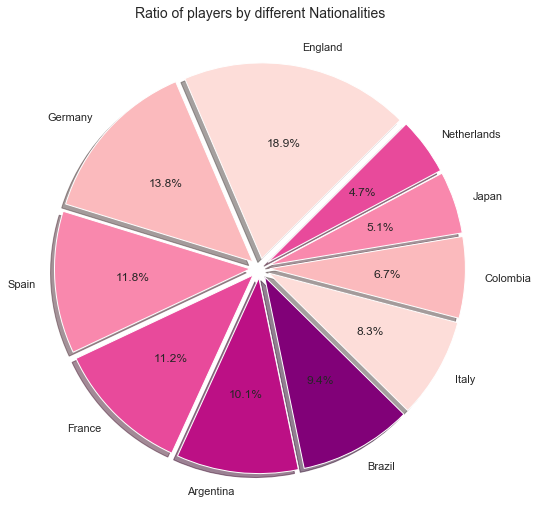

In [94]:
#Formatting the plot
plt.pie(sizes, explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05), labels=labels, colors=sns.color_palette("RdPu"),
autopct='%1.1f%%', shadow=True, startangle=45)
plt.title('Ratio of players by different Nationalities', fontsize=14)
plt.show()

In [95]:
#Top 5 countries - England,Germany,Spain,France,Argentina comstitute of around 60% of the total players
#These are also the countries which have highest number of internal leagues

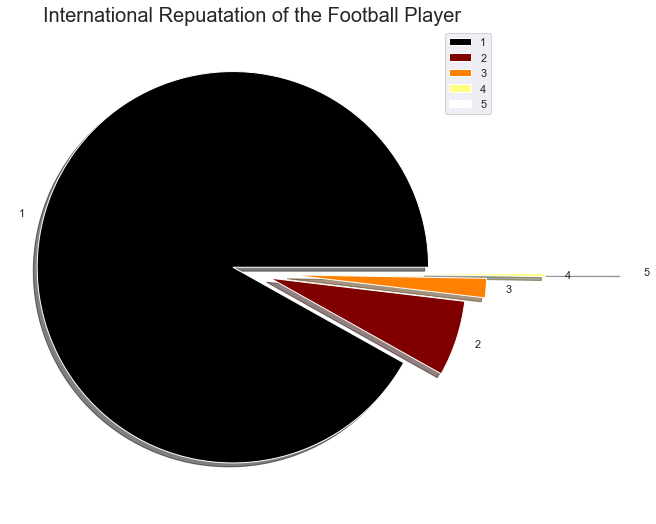

In [96]:
#Pie chart to represent share of international repuatation
#Creating a function to create piecharts 
def piechart(variable, title, color):
    labels = ['1', '2', '3', '4', '5']
    variable = variable.value_counts()
    explode = [0.1, 0.1, 0.2, 0.5, 0.9]
    plt.rcParams['figure.figsize'] = (9, 9)
    plt.pie(variable, labels = labels, colors = color, explode = explode, shadow = True)
    plt.title(title, fontsize = 20)
    plt.legend()
    plt.show()

piechart(df['international_reputation'], 'International Repuatation of the Football Player', plt.cm.afmhot(np.linspace(0, 1, 5)))

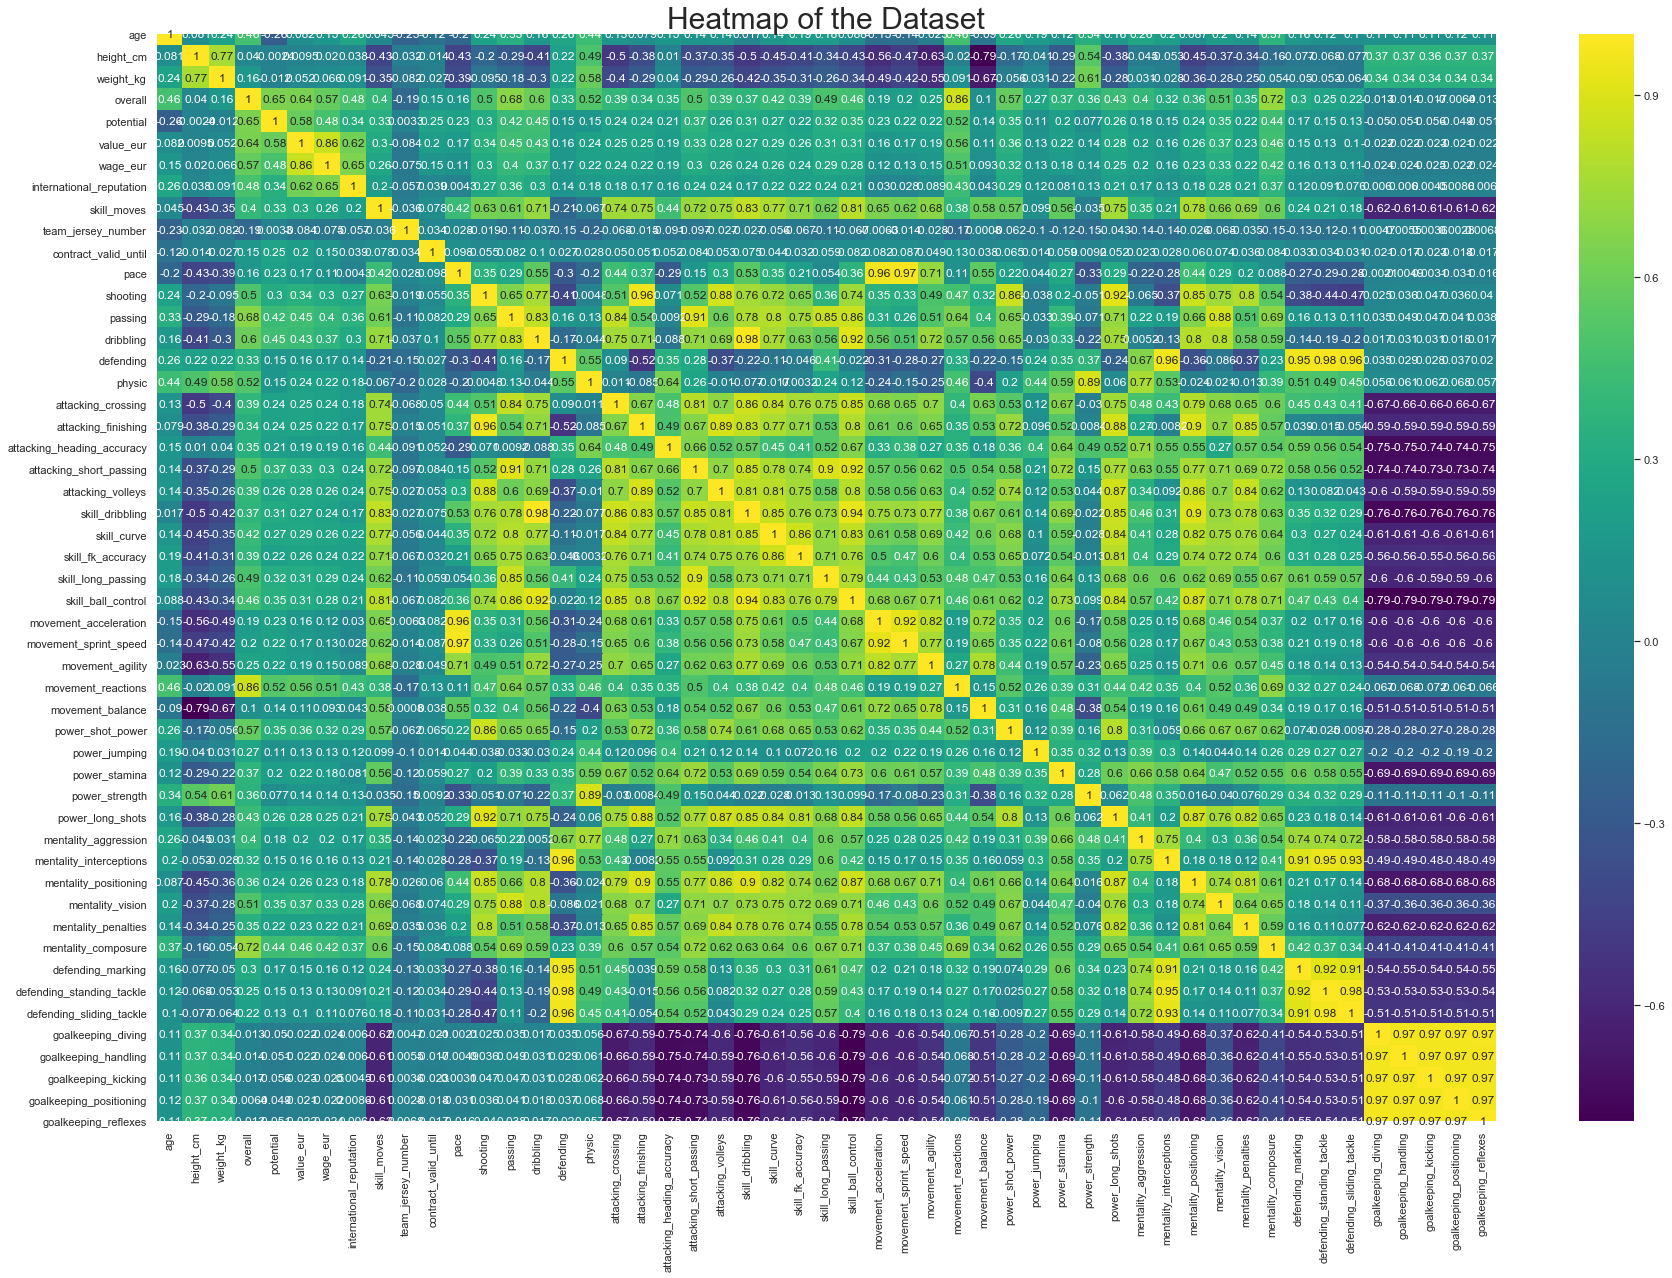

In [97]:
#Checking the correlation between the features
plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')
plt.title('Heatmap of the Dataset', fontsize = 30)
plt.show()

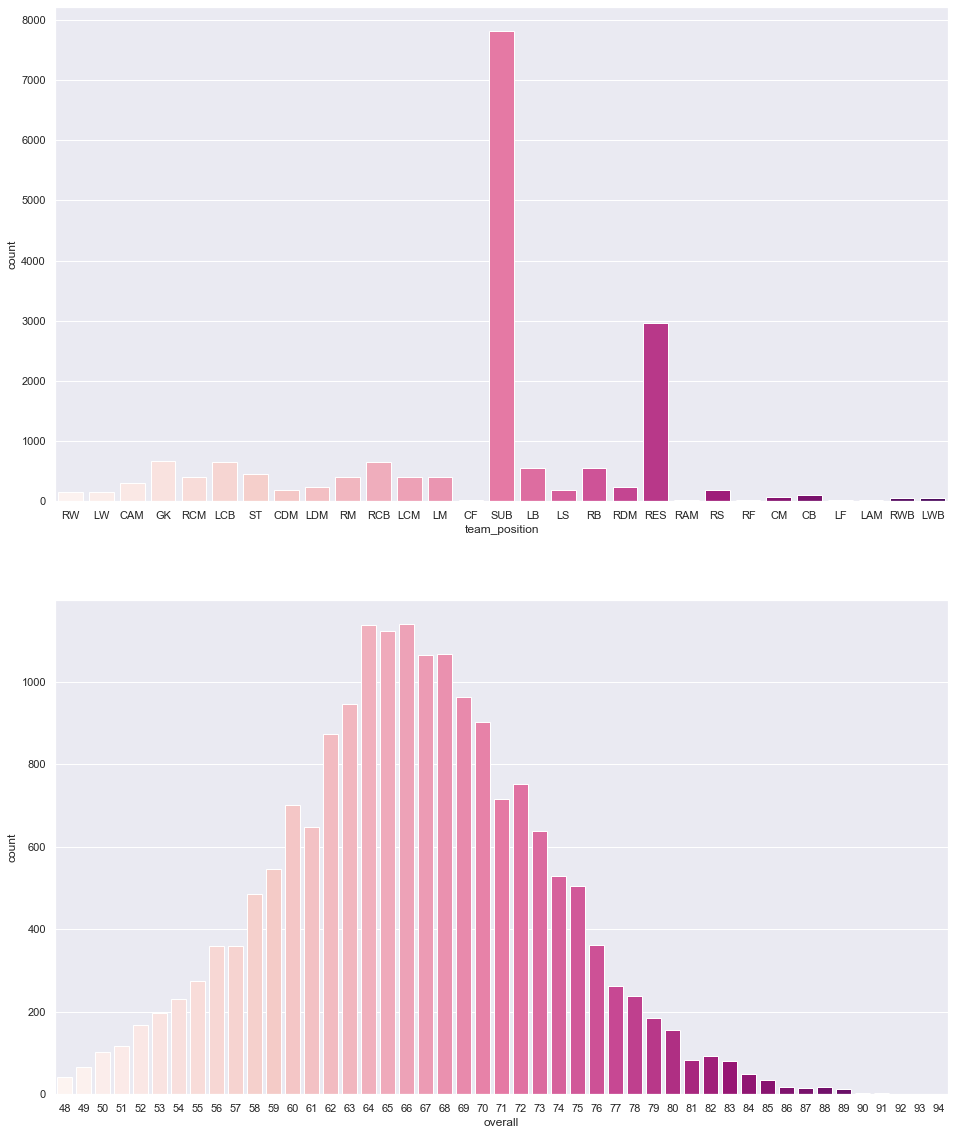

In [98]:
#Number of players by Position and Overall

sns.set(style="darkgrid")
fig, axs = plt.subplots(nrows=2, figsize=(16, 20))
sns.countplot(df['team_position'], palette="RdPu", ax=axs[0])
sns.set(style="darkgrid")
sns.countplot(df['overall'], palette="RdPu",ax=axs[1])

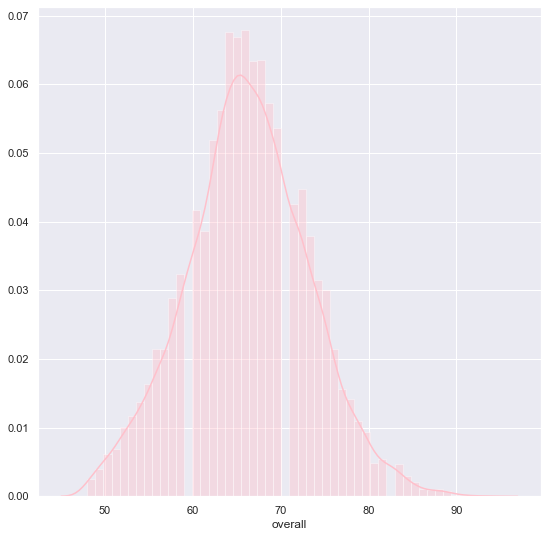

In [105]:
#We check the distribution of the overall rating
sns.distplot(df['overall'], color="Pink")

In [ ]:
#We see that the average overall value is around 65. The data is normally distributed.

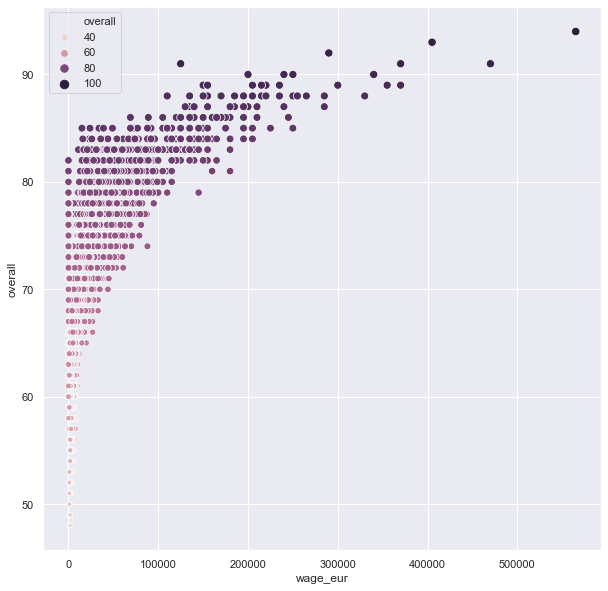

In [100]:
#Checking the relationship between overall rating and wage
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="wage_eur",y="overall", hue="overall", size="overall", data=df)


In [ ]:
#The overall value is positively correlated with the wages of the player. 

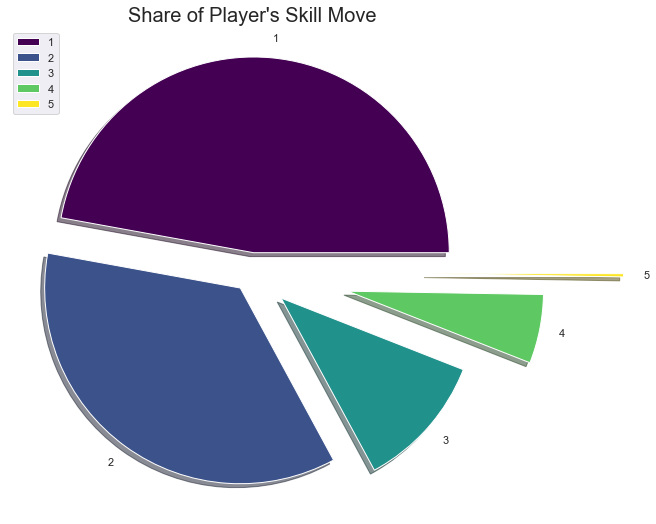

In [102]:
#Pie chart to represent share of Player's Skill Move
piechart(df['skill_moves'], "Share of Player's Skill Move", plt.cm.viridis(np.linspace(0, 1, 5)))

In [106]:
#Young Players Analysis

youth_special = df[(df['overall']>75) & (df['potential'] - df['overall']>=10)].sort_values(by='overall',ascending=False)
cols = ['long_name','club','age','overall','potential','team_position','value_eur']
youth_special[cols]

,long_name,club,age,overall,potential,team_position,value_eur
411,João Félix Sequeira,Atlético Madrid,19,80,93,RS,28000000
569,Rodrigo Bentancur Colmán,Juventus,22,79,89,SUB,20000000
570,Lucas Tolentino Coelho de Lima,Milan,21,79,89,CAM,20500000
568,Vinícius José de Oliveira Júnior,Real Madrid,18,79,92,RW,22500000
753,Alex Meret,Napoli,22,78,89,GK,14000000
754,Ismaïla Sarr,Watford,21,78,88,SUB,17000000
995,Exequiel Palacios,River Plate,20,77,87,LDM,14000000
997,Patrick Cutrone,Wolverhampton Wanderers,21,77,87,SUB,14500000
996,Marko Grujić,Hertha BSC,23,77,87,RCM,13000000
994,Davide Calabria,Milan,22,77,87,RB,13000000


Text(0.5, 1.0, 'Distribution of young prospects by Overall')

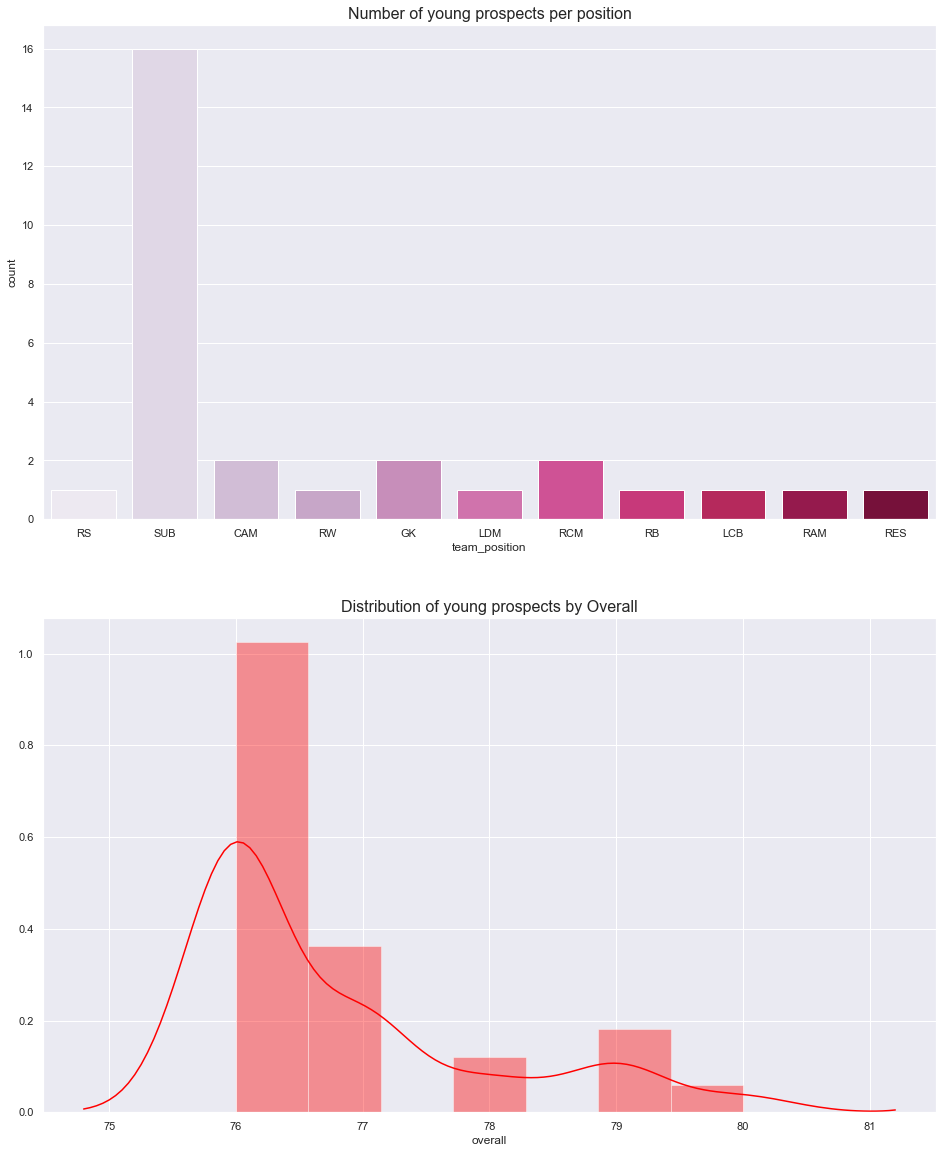

In [107]:
#Checking the distribution of the young players by overall score and team position
sns.set(style="darkgrid")
fig, axs = plt.subplots(nrows=2, figsize=(16, 20))
sns.countplot(youth_special['team_position'], palette="PuRd", ax=axs[0])
axs[0].set_title('Number of young prospects per position', fontsize=16)
sns.distplot(youth_special['overall'],color="Red", ax=axs[1])
axs[1].set_title('Distribution of young prospects by Overall', fontsize=16)

In [108]:
#It can be seen that most promising young players have an overall score of 76 and 77

youth_special['team_position'].unique()

array(['RS', 'SUB', 'CAM', 'RW', 'GK', 'LDM', 'RCM', 'RB', 'LCB', 'RAM',
       'RES'], dtype=object)